# for Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction


In [84]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
stemmer=PorterStemmer()

from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re


In [85]:
# 1 point
# load the data from spam.csv
data = 0
# YOUR CODE HERE
data = pd.read_csv('spam.csv')

In [86]:
assert data.shape == (5572,5)

In [87]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [88]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [89]:
# 1 point
# drop the columns unnamed 2,3,4

# YOUR CODE HERE
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [90]:
assert data.shape == (5572,2)

In [91]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
# 1 POINT
# rename the columns to labels and messages
# YOUR CODE HERE
data.columns = ['labels', 'messages']

In [93]:
assert data['labels'].shape == (5572,)
assert data['messages'].shape == (5572,)

In [94]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

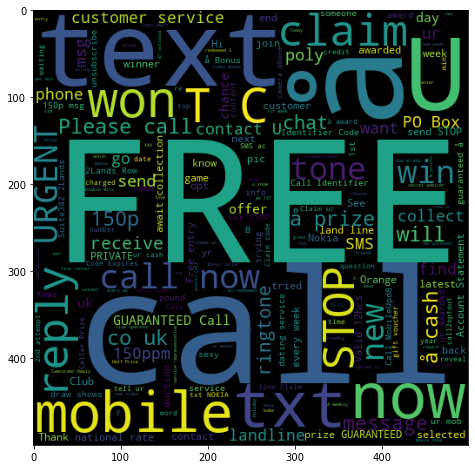

In [95]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

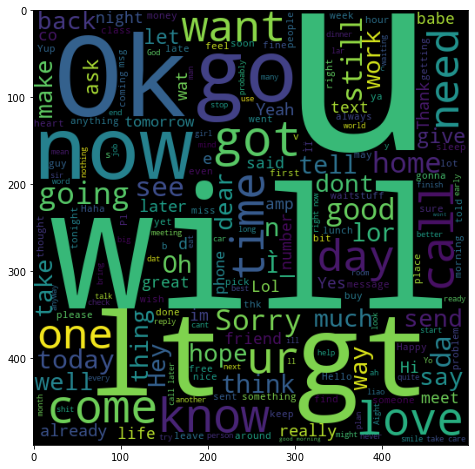

In [96]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [97]:
# 2 points 
# change the labels to 1 or 0 instead of 'spam' and 'ham'
# Encoding our Labels

# YOUR CODE HERE
data = data.replace({'spam':1, 'ham':0})

In [98]:
assert data['labels'][0] == 0
assert data['labels'][1] == 0
assert data['labels'][2] == 1

In [99]:
# this part is given to you as a quick glance on the preprocessing in NLP

# preprocessing the Messages

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    
            
    

100%|██████████| 5572/5572 [05:49<00:00, 15.93it/s]


In [101]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [102]:
len(new_data)

5572

In [103]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [104]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# splitting the data into training and testing

In [105]:
from sklearn.model_selection import train_test_split

#1 points
# do the train test split, tested with random_state= = 0
# you will need to make sure your data is a numpy array
X_train, X_test, Y_train, Y_test = 0,0,0,0
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(new_data, Y, random_state=0,train_size=0.8)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

In [106]:

assert X_train.shape == (4457,)
assert X_test.shape == (1115,)
assert Y_train.shape == (4457,)
assert Y_test.shape == (1115,)

# Vectorization using Bag of Words

In [107]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
# 3 points
# use CountVectorizer to vectorize the data

# YOUR CODE HERE
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [108]:
assert len(X_test[0]) == 29
assert len(X_train[0]) == 36
assert len(X_train[3]) == 21
assert len(X_test[3]) == 58

AssertionError: 

In [ ]:
X_train_vect

In [ ]:
X_test_vect

# Lets train our Model - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# 3 points

#train your model

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
model.classes_
assert model.classes_.shape == (2,)
assert model.classes_[0] == 0
assert model.classes_[1] == 1

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

#7 points

# predict and get the accuracy on test as well as the confusion matrix

acc = 0

conf_matrix = 0
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert Y_pred.shape == (1115,)
assert acc >= 80
assert conf_matrix[0][0] >= 3*conf_matrix[0][1]
assert conf_matrix[1][1] >= 3*conf_matrix[1][0]